In [7]:
%matplotlib inline

In [1]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
project_dir = os.path.join(nb_dir, os.pardir)

if project_dir not in sys.path:
   sys.path.append(project_dir)

from src import webscrapers
from src import corpus

# Scrape swear word list

We scrape swear words from the web from the site:
http://www.noswearing.com/

It is a community driven list of swear words.

In [26]:
import string
import os
import requests
from fake_useragent import UserAgent
from lxml import html

def requests_get(url):        
    ua = UserAgent().random  
    return requests.get(url, headers={'User-Agent': ua})

def get_swear_words(save_file='swear-words.txt'): 
    """
    Scrapes a comprehensive list of swear words from noswearing.com
    """
    words = ['niggas']
    if os.path.isfile(save_file):
        with open(save_file, 'rt') as f:
            for line in f:
                words.append(line.strip())
        
        return words
        
    base_url = 'http://www.noswearing.com/dictionary/'
    letters = '1' + string.ascii_lowercase
    
    for letter in letters:
        full_url = base_url + letter
        result = requests_get(full_url)
        tree = html.fromstring(result.text)
        search = tree.xpath("//td[@valign='top']/a[@name and string-length(@name) != 0]")
        
        if search is None:
            continue
        
        for result in search:
            words.append(result.get('name').lower())
            
    with open(save_file, 'wt') as f:
        for word in words:
            f.write(word)
            f.write('\n')
    
    return words

print(get_swear_words())


['niggas', 'anus', 'arse', 'arsehole', 'ass', 'ass-hat', 'ass-jabber', 'ass-pirate', 'assbag', 'assbandit', 'assbanger', 'assbite', 'assclown', 'asscock', 'asscracker', 'asses', 'assface', 'assfuck', 'assfucker', 'assgoblin', 'asshat', 'asshead', 'asshole', 'asshopper', 'assjacker', 'asslick', 'asslicker', 'assmonkey', 'assmunch', 'assmuncher', 'assnigger', 'asspirate', 'assshit', 'assshole', 'asssucker', 'asswad', 'asswipe', 'axwound', 'bampot', 'bastard', 'beaner', 'bitch', 'bitchass', 'bitches', 'bitchtits', 'bitchy', 'blow job', 'blowjob', 'bollocks', 'bollox', 'boner', 'brotherfucker', 'bullshit', 'bumblefuck', 'butt plug', 'butt-pirate', 'buttfucka', 'buttfucker', 'camel toe', 'carpetmuncher', 'chesticle', 'chinc', 'chink', 'choad', 'chode', 'clit', 'clitface', 'clitfuck', 'clusterfuck', 'cock', 'cockass', 'cockbite', 'cockburger', 'cockface', 'cockfucker', 'cockhead', 'cockjockey', 'cockknoker', 'cockmaster', 'cockmongler', 'cockmongruel', 'cockmonkey', 'cockmuncher', 'cocknose'

# Testing TextBlob

I don't really like TextBlob as it tries to be "nice", but lacks a lot of basic functionality.

1. Stop words not included
2. Tokenizer is pretty meh.
3. No built in way to obtain word frequency

In [2]:
import os
import operator

import pandas as pd
from textblob import TextBlob, WordList
from nltk.corpus import stopwords

def get_data_paths():
    dir_path = os.path.dirname(os.path.realpath('.'))
    data_dir = os.path.join(dir_path, 'billboard-hot-100-data')
    dirs = [os.path.join(data_dir, d, 'songs.csv') for d in os.listdir(data_dir) 
            if os.path.isdir(os.path.join(data_dir, d))]
    
    return dirs

def lyric_file_to_text_blob(row):
    """
    Transform lyrics column to TextBlob instances.
    """
    return TextBlob(row['lyrics'])

def remove_stop_words(word_list):
    wl = WordList([])
    
    stop_words = stopwords.words('english')
    for word in word_list:
        if word.lower() not in stop_words:
            wl.append(word)
    
    return wl

def word_freq(words, sort='desc'):
    """
    Returns frequency table for all words provided in the list.
    """
    
    reverse = sort == 'desc'
    
    freq = {}
    for word in words:
        if word in freq:
            freq[word] = freq[word] + 1
        else:
            freq[word] = 1
            
    return sorted(freq.items(), key=operator.itemgetter(1), reverse=reverse)

data_paths = corpus.raw_data_dirs()
songs = corpus.load_songs(data_paths[0])

songs = pd.DataFrame.from_dict(songs)
songs["lyrics"] = songs.apply(lyric_file_to_text_blob, axis=1)

all_words = WordList([])

for i, row in songs.iterrows():
    all_words.extend(row['lyrics'].words)

cleaned_all_words = remove_stop_words(all_words)
cleaned_all_words = pd.DataFrame(word_freq(cleaned_all_words.lower()), columns=['word', 'frequency'])
cleaned_all_words

,word,frequency
0,n't,819
1,'m,569
2,'s,405
3,know,376
4,got,339
5,like,335
6,yeah,225
7,low,214
8,love,212
9,na,210


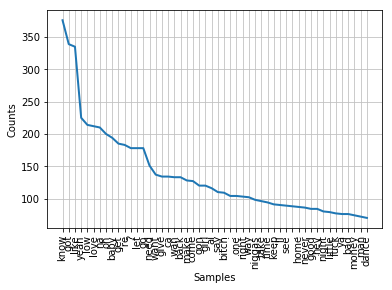

[('know', 376),
 ('got', 339),
 ('like', 335),
 ('yeah', 225),
 ('low', 214),
 ('love', 212),
 ('na', 210),
 ('oh', 200),
 ('baby', 194),
 ('get', 185),
 ("'re", 183),
 ('?', 178),
 ('let', 178),
 ('go', 178),
 ('need', 151),
 ('want', 137),
 ('give', 134),
 ('ca', 134),
 ('wan', 133),
 ('back', 133),
 ('make', 128),
 ('come', 127),
 ('gon', 120),
 ('girl', 120),
 ('ai', 116),
 ('say', 110),
 ('bitch', 109),
 (':', 104),
 ('one', 104),
 ('right', 103),
 ('way', 102),
 ('niggas', 98),
 ('take', 96),
 ('time', 94),
 ('keep', 91),
 ("'ll", 90),
 ('see', 89),
 ('.', 88),
 ('home', 87),
 ('never', 86),
 ('good', 84),
 ('hey', 84),
 ('night', 80),
 ('little', 79),
 ('fuck', 77),
 ('ya', 76),
 ('bad', 76),
 ('money', 74),
 ('man', 72),
 ('dance', 70),
 ('nigga', 69),
 ("'ve", 69),
 ('cause', 68),
 ("''", 66),
 ('even', 66),
 ('better', 65),
 ('verse', 63),
 ('shit', 62),
 ('look', 62),
 ('hold', 61),
 ('party', 60),
 ('feel', 60),
 ('tell', 59),
 ('put', 58),
 ('every', 57),
 ('could', 57),
 

In [3]:
import pandas as pd
import nltk

def remove_extra_junk(word_list):
    words = []
    remove = [",", "n't", "'m", ")", "(", "'s", "'", "]", "["]
    
    for word in word_list:
        if word not in remove:
            words.append(word)
            
    return words
    
    
data_paths = corpus.raw_data_dirs()
songs = corpus.load_songs(data_paths[0])
songs = pd.DataFrame.from_dict(songs)

all_words = []

for i, row in songs.iterrows():
    all_words.extend(nltk.tokenize.word_tokenize(row['lyrics']))

cleaned_all_words = [w.lower() for w in remove_extra_junk(remove_stop_words(all_words))]
freq_dist = nltk.FreqDist(cleaned_all_words)

freq_dist.plot(50)
freq_dist.most_common(100)
#cleaned_all_words = pd.DataFrame(word_freq(cleaned_all_words), columns=['word', 'frequency'])
#cleaned_all_words

# Repetitive songs skewing data?

Some songs may be super reptitive. Lets look at a couple of songs that have the word in the title. These songs probably repeat the title a decent amount in their song. Hence treating all lyrics as one group of text less reliable in analyzing frequency.

To simplify this process, we can look at only single word titles. This will at least give us a general idea if the data could be skewed by a single song or not.

In [4]:
for i, song in songs.iterrows():
    title = song['title']
    title_words = title.split(' ')
    
    if len(title_words) > 1:
        continue
    
    lyrics = song['lyrics']
    words = nltk.tokenize.word_tokenize(lyrics)
    clean_words = [w.lower() for w in remove_extra_junk(remove_stop_words(words))]
    
    dist = nltk.FreqDist(clean_words)
    freq = dist.freq(title_words[0].lower())
    
    if freq > .1:
        print(song['artist'], title)

Chris Brown Featuring Usher & Gucci Mane Party
Marshmello Alone
Dierks Bentley Black
Ugly God Water


## Seems pretty reptitive

There are a handful of single word song titles that repeat the title within the song at least 10% of the time. This gives us a general idea that there is most likely a skew to the data. I think it is safe to assume that if a single word is repeated many times, the song is most likely reptitive.

Lets look at the song "water" by Ugly God to confirm.

I drip on your bitch like water
I splash on your bitch with the water
I feel like I'm 21 Savage
I pull up and fuck on your daughter
I pull up and fuck on your daughter
Water water water water water water water water
I drip on your bitch like water
I splash on your bitch with the water
Water water water water

Water on my bitch I keep her wet like my cellphone
Bitches on me dark skins and the redbones
Ugly God wrap your bitch up like some headphones
You say I ain't shit bitch I'm ugly god i'm well known
I ain't got time for no wife, yeah
Lmfao you kiss bitches I pipe, yeah
Bitch I feel like Yachty just give me one night, yeah
And if she gay I tell her i'm a fucking dike yeah
Yeah bitch i'm a dike
Strapped up like a dike
Man made like a dike
Boosie faded like a dike
Niggas trynna join the wave
Pussy nigga take a hike
Your bitch my slave
Bitch I'm balling like Mike
Bitch I'm balling like Mike

I drip on your bitch like water
I splash on your bitch with the water
I feel like I'm 21 Savage


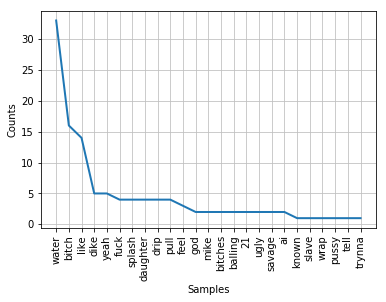

0.2185430463576159

In [5]:
song_title_to_analyze = 'Water'

lyrics = songs['lyrics'].where(songs['title'] == song_title_to_analyze, '').max()
print(lyrics)
words = nltk.tokenize.word_tokenize(lyrics)
clean_words = [w.lower() for w in remove_extra_junk(remove_stop_words(words))]
water_dist = nltk.FreqDist(clean_words)
water_dist.plot(25)

water_dist.freq(song_title_to_analyze.lower())

## Looking at swear word distribution

Let's look at the distribution of swear words...

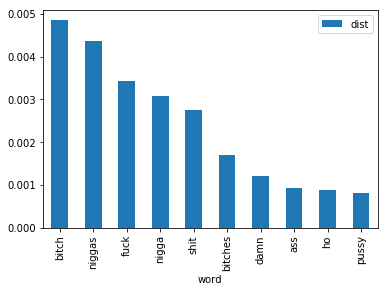

In [8]:
sws = []

for sw in set(corpus.swear_words()):
    sws.append({'word': sw,
                'dist': freq_dist.freq(sw)})
    
sw_df = pd.DataFrame.from_dict(sws)
sw_df.nlargest(10, 'dist').plot(x='word', kind='bar')